In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import ADASYN

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
ads = ADASYN(random_state=0)

In [4]:
res.resample_directory(ads, path, 'ADASYN', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/ADASYN/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/ADASYN/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7666 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [10]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model(do_regularization=True)
cnn.summary()

# Fit Model

In [11]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=100)

Epoch 1/100
163/163 [==============================] - 12s 75ms/step - loss: 1.0985 - tp: 4056.0000 - fp: 1207.0000 - tn: 4009.0000 - fn: 1160.0000 - accuracy: 0.7731 - precision: 0.7707 - recall: 0.7776 - auc: 0.8675 - val_loss: 0.7552 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.7988
Epoch 2/100
163/163 [==============================] - 10s 59ms/step - loss: 0.4801 - tp: 4566.0000 - fp: 634.0000 - tn: 4554.0000 - fn: 622.0000 - accuracy: 0.8790 - precision: 0.8781 - recall: 0.8801 - auc: 0.9548 - val_loss: 0.6760 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8457
Epoch 3/100
163/163 [==============================] - 10s 59ms/step - loss: 0.4203 - tp: 4651.0000 - fp: 566.0000 - tn: 4650.0000 - fn: 565.0000 - accuracy: 0.8916 - precision: 0.8915 - recall: 0.8917 - auc:

Epoch 22/100
163/163 [==============================] - 9s 56ms/step - loss: 0.3075 - tp: 4756.0000 - fp: 438.0000 - tn: 4764.0000 - fn: 446.0000 - accuracy: 0.9150 - precision: 0.9157 - recall: 0.9143 - auc: 0.9746 - val_loss: 0.6935 - val_tp: 228.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 76.0000 - val_accuracy: 0.7188 - val_precision: 0.7059 - val_recall: 0.7500 - val_auc: 0.8047
Epoch 23/100
163/163 [==============================] - 9s 57ms/step - loss: 0.2946 - tp: 4794.0000 - fp: 417.0000 - tn: 4799.0000 - fn: 422.0000 - accuracy: 0.9196 - precision: 0.9200 - recall: 0.9191 - auc: 0.9768 - val_loss: 0.5155 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8789
Epoch 24/100
163/163 [==============================] - 9s 56ms/step - loss: 0.3109 - tp: 4753.0000 - fp: 448.0000 - tn: 4754.0000 - fn: 449.0000 - accuracy: 0.9138 - precision: 0.9139 - recall: 0.9137 - auc: 0

Epoch 43/100
163/163 [==============================] - 10s 60ms/step - loss: 0.2897 - tp: 4749.0000 - fp: 449.0000 - tn: 4753.0000 - fn: 453.0000 - accuracy: 0.9133 - precision: 0.9136 - recall: 0.9129 - auc: 0.9741 - val_loss: 0.5428 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8633
Epoch 44/100
163/163 [==============================] - 10s 59ms/step - loss: 0.2970 - tp: 4754.0000 - fp: 455.0000 - tn: 4761.0000 - fn: 462.0000 - accuracy: 0.9121 - precision: 0.9127 - recall: 0.9114 - auc: 0.9721 - val_loss: 0.5591 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.8398
Epoch 45/100
163/163 [==============================] - 10s 59ms/step - loss: 0.2864 - tp: 4769.0000 - fp: 444.0000 - tn: 4772.0000 - fn: 447.0000 - accuracy: 0.9146 - precision: 0.9148 - recall: 0.9143 - auc

Epoch 64/100
163/163 [==============================] - 10s 59ms/step - loss: 0.2691 - tp: 4772.0000 - fp: 426.0000 - tn: 4776.0000 - fn: 430.0000 - accuracy: 0.9177 - precision: 0.9180 - recall: 0.9173 - auc: 0.9776 - val_loss: 0.4790 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8984
Epoch 65/100
163/163 [==============================] - 10s 61ms/step - loss: 0.2552 - tp: 4827.0000 - fp: 387.0000 - tn: 4829.0000 - fn: 389.0000 - accuracy: 0.9256 - precision: 0.9258 - recall: 0.9254 - auc: 0.9800 - val_loss: 0.5565 - val_tp: 228.0000 - val_fp: 76.0000 - val_tn: 228.0000 - val_fn: 76.0000 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8594
Epoch 66/100
163/163 [==============================] - 9s 57ms/step - loss: 0.2704 - tp: 4787.0000 - fp: 415.0000 - tn: 4787.0000 - fn: 415.0000 - accuracy: 0.9202 - precision: 0.9202 - recall: 0.9202 - auc:

Epoch 85/100
163/163 [==============================] - 9s 57ms/step - loss: 0.2620 - tp: 4793.0000 - fp: 422.0000 - tn: 4794.0000 - fn: 423.0000 - accuracy: 0.9190 - precision: 0.9191 - recall: 0.9189 - auc: 0.9778 - val_loss: 0.5523 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8555
Epoch 86/100
163/163 [==============================] - 9s 58ms/step - loss: 0.2524 - tp: 4827.0000 - fp: 388.0000 - tn: 4828.0000 - fn: 389.0000 - accuracy: 0.9255 - precision: 0.9256 - recall: 0.9254 - auc: 0.9804 - val_loss: 0.5406 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8496
Epoch 87/100
163/163 [==============================] - 9s 58ms/step - loss: 0.2530 - tp: 4808.0000 - fp: 382.0000 - tn: 4806.0000 - fn: 380.0000 - accuracy: 0.9266 - precision: 0.9264 - recall: 0.9268 - auc: 0

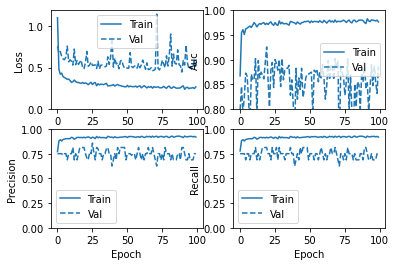

In [12]:
cnn.plot_history()

In [13]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.83      0.82      0.83       234
   PNEUMONIA       0.90      0.90      0.90       390

    accuracy                           0.87       624
   macro avg       0.86      0.86      0.86       624
weighted avg       0.87      0.87      0.87       624



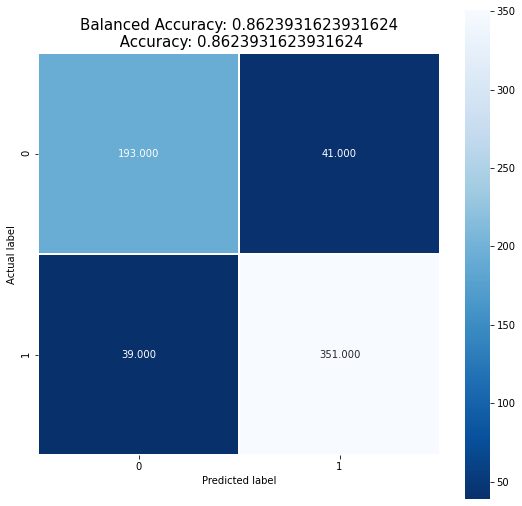

In [14]:
cnn.display_confusion_matrix(test_set)